## Introduction:



In this article,we will go through the tutorial for implementing svm(support vector machine) algorithm using the Sklearn(a.k.a Scikit learn) library of Python.We will first look at the working of an svm classifier to better understand the concept followed by an end-to-end project with a dataset to illustrate an example of svm using the module sklearn.svm.SVC





### What is Support Vector Machine Algorithm?

The Support Vector Machine Algorithm,better known as SVM is a supervised machine learning algorithm which finds applications in solving Classification and Regression problems.The primary objective of the SVM algorithm is to create a decision boundary that can separate an n-dimensional space into distinct classes,in order to classify new test data point into the correct category while making future predictions. SVM makes use of extreme data points(vectors) in order to generate a hyperplane,these vecors/data points are called support vectors.

### Features of SVM:

Hyperplane:This is the decision boundary which spearate two classes in n-dimensional space.The number of features present in our dataset set decide the number of hyperplanes.Suppose we have just two features,then the hyperplane will be a straight line,in case of 3 features we get a 2-D plane.
Support Vectors:These data points affect the positioning of the hyperplane
Margin:Distnace between a vector/data point and the hyperplane is called margin.
Maximum margin:hyperplane with the maximum margin is called optimal hyperplane.

### Importing necessary libraries:
We first load the libraries required to build our model.


In [2]:
#Import python packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report


### Reading the csv file into Pandas:

In [3]:
df = pd.read_csv(r"C:\Users\Veer Kumar\Downloads\heart.csv")

### Breakdown of each feature present in our dataset:
age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Getting summary statistics of  our dataset:

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### THE DATASET:
Our dataset has 303 rows and 14 columns.

We are making use of heart.csv dataset to analyse risk of heart disease among patients.
To perform data visualization we use the Seaborn library to plot relationship between age of patient and their corresponding cholestrol level.
We plot a confusion matrix to evaluate true postives,true negatives,false positives and false negatives among our predictions
Target column signifies either presence or absence of Heart disease (0 = no, 1 = yes) and we will make predictions on this column using test data.

### Visualize Data:

After loading the dataset,we will visualize the relationship between age of patient and cholestrol levels using a scatter plot.

Text(0.5, 1.0, 'Age-Cholesterol Plot')

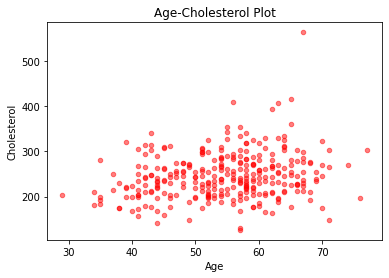

In [7]:
df.plot(kind = 'scatter',x = 'age', y = 'chol',alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

From the above,visualisation we can infer that age group 60 to 70 years old have slightly higher cholestrol levels as compared to other age groups.In addition to that,we also infer that ages below 40 mostly have cholestrol levels under 300 level.

### Data Preprocessing:
Here,we will separate the feature and target matrix:

In [8]:
#Separate Feature and Target Matrix
x = df.drop('target',axis = 1) 
y = df.target

### Splitting dataset into Training and Testing set:
We split training and testing sets with the help of train_test_split() function

In [9]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100) # 70% training and 30% test

### Creating an SVM Classifier:

Here we create a SVM classifier on which our model will be trained using the training data.
In additon to training the model,we need  to perform hyperparameter tuning using appropriate parameters in order to maximize accuracy
of our model.In our example here,we have set the follwoing parameters.


In [10]:
#Create a svm Classifier and hyper parameter tuning
ml = svm.SVC() 



### Model fitting and Predictions and K-cross Validation using GridSearchCV:

Here,we use the GridSearchCV module in order to test a number of combinations of parameters which can optimize the performance of our model.We will be first fitting the model using training values,which will be followed by obtaining the best score from all of the K-fold cross validations performed.Since our dataset is limited the K fold Corss validation is a good method to estimate the performance of our model when it is used to make predictions using unseen data.
For hyperparameter tuning we have 3 parameters to consider:

Kernel=rbf(radial basis function):kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset.
    
C parameter:It is a hypermeter in SVM to control error.It acts like a penalty parameter,a small value of C will result in a larger margin separating hyperplane.If we dont want our training points to be missclassified,then we go for large value of C,which will result in smaller margin separating plane,but it can lead to an overfitting problem where the model may not generalize well on training data.

Gamma parameter:This will decide curvature of decision boundary,higher the gamma,greater is the curvature of decision boundary.



In [11]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:   11.7s finished


These are the optimal parameters obtained after performing gridsearch:

In [12]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [13]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


Accuracy for our training dataset with tuning is : 81.00%


### Finding Test-Model Accuracy:
Test model accuracy will tell us about how well our model generalized on the training data,on the basis of predicting values for unseen data.

In [14]:
y_test_hat=grid.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 80.33%


### Plotting a Confusion Matrix:
Now we evaluate the model using the testing data,for this purpose we set up a confusion matrix to help us in finding out true postives,true negatives,false positives and false negatives.

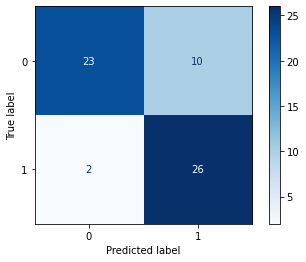

In [15]:

confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(grid, x_test, y_test,cmap=plt.cm.Blues)

32 patients were predicted that they will have Heart Disease,the Prediction was CORRECT (True-Positive)
42 patients were predicted that they will NOT have Heart Disease,the Prediction was CORRECT (True-Negative)
9 patients were predicted that they will have Heart Disease but the Prediction was WRONG (False-Positive)
8 patients were predicted that they will NOT have Heart Disease but the Prediction was WRONG (False-Negative)

# Conclusion

We Hope you liked our tutorial and now better understand how to implement Support Vector Machines(SVM) using Sklearn(Scikit Learn) in Python.Here,we have illustrated an end-to-end example of using a dataset to build an SVM model in order to predict heart disease making use of the sklearn.svm.SVC module.